In [1]:
# prepared dataset
import pandas as pd

df1 = pd.read_csv('/home/sam/Desktop/samlab/codes/DataScience/datasets/mobileprice/train.csv')
df2 = pd.read_csv('/home/sam/Desktop/samlab/codes/DataScience/datasets/mobileprice/test.csv')

In [2]:
## configure pandas for in reading data in proper way
pd.set_option('display.max_columns', None)

In [3]:
## let read the data
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
## lets visulize the data
import matplotlib.pyplot as plt

df1['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_range', ylabel='count'>

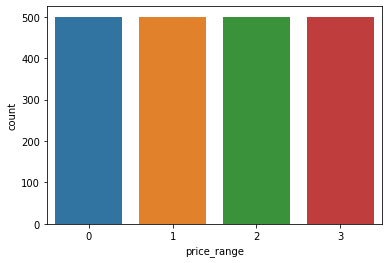

In [17]:
import seaborn as sns
sns.countplot(df1.price_range, data =df1)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

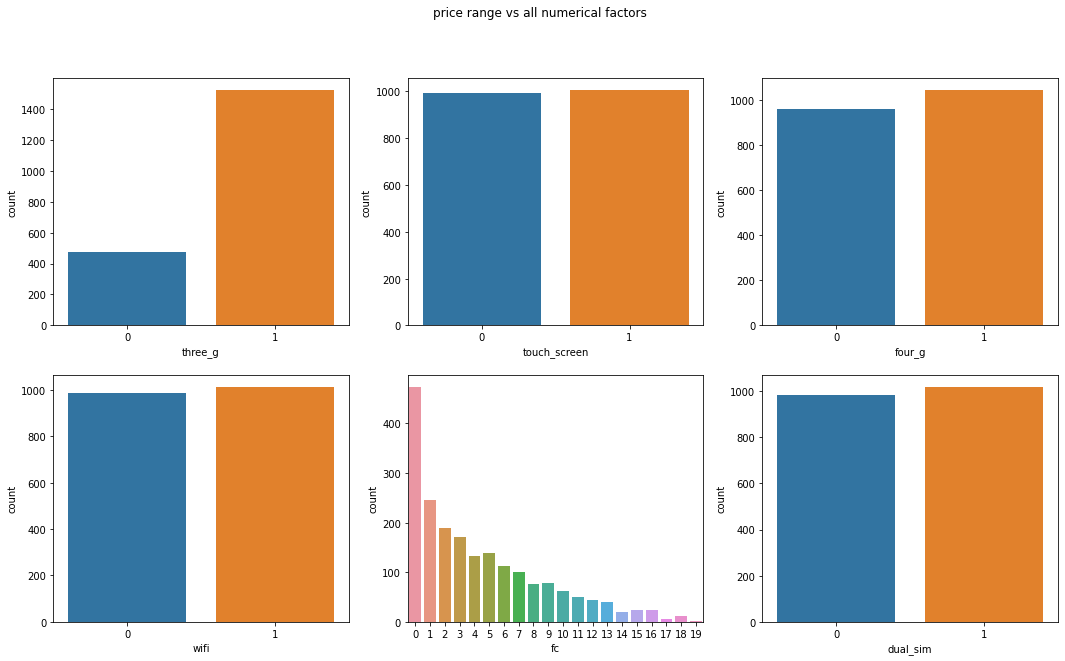

In [39]:
fig, axes = plt.subplots(2,3, figsize= (18, 10))
fig.suptitle('price range vs all numerical factors')
sns.countplot(ax= axes[0, 0], x=df1.three_g, data =df1)
sns.countplot(ax= axes[0, 1], x=df1.touch_screen, data =df1)
sns.countplot(ax= axes[0, 2], x=df1.four_g, data =df1)
sns.countplot(ax= axes[1, 0], x=df1.wifi, data =df1)
sns.countplot(ax= axes[1, 1], x=df1.fc, data =df1)
sns.countplot(ax= axes[1, 2], x=df1.dual_sim, data =df1)

In [356]:
# let import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [357]:
# split data into x and y
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [381]:
model1 = RandomForestClassifier()

In [382]:
## cs with KFold
def cross_val(model1, cv):
    from sklearn.model_selection import KFold, cross_val_score
    kfold = cross_val_score(model1, x, y, cv = 10)
    return kfold

In [383]:
result1 = cross_val(model1, 5)
np.mean(result1)

0.881

In [417]:
from sklearn.model_selection import GridSearchCV
Grc = GridSearchCV(model1, {'n_estimators' : [100, 120, 150, 200], 'criterion': ['gini' , 'entropy']}, cv=5)
Grc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 120, 150, 200]})

In [418]:
Grc.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [419]:
Grc.best_score_

0.8699999999999999